# PUBG Finish Placement Prediction
Data Source: https://www.kaggle.com/c/pubg-finish-placement-prediction/data

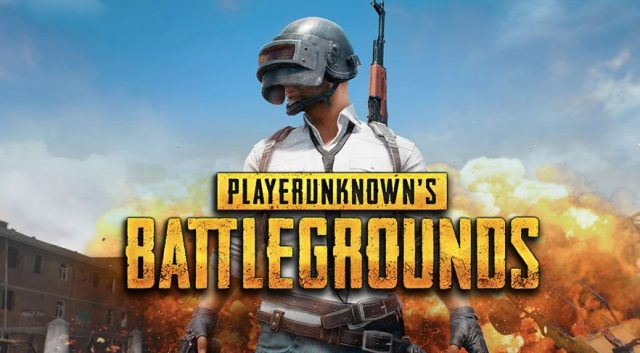

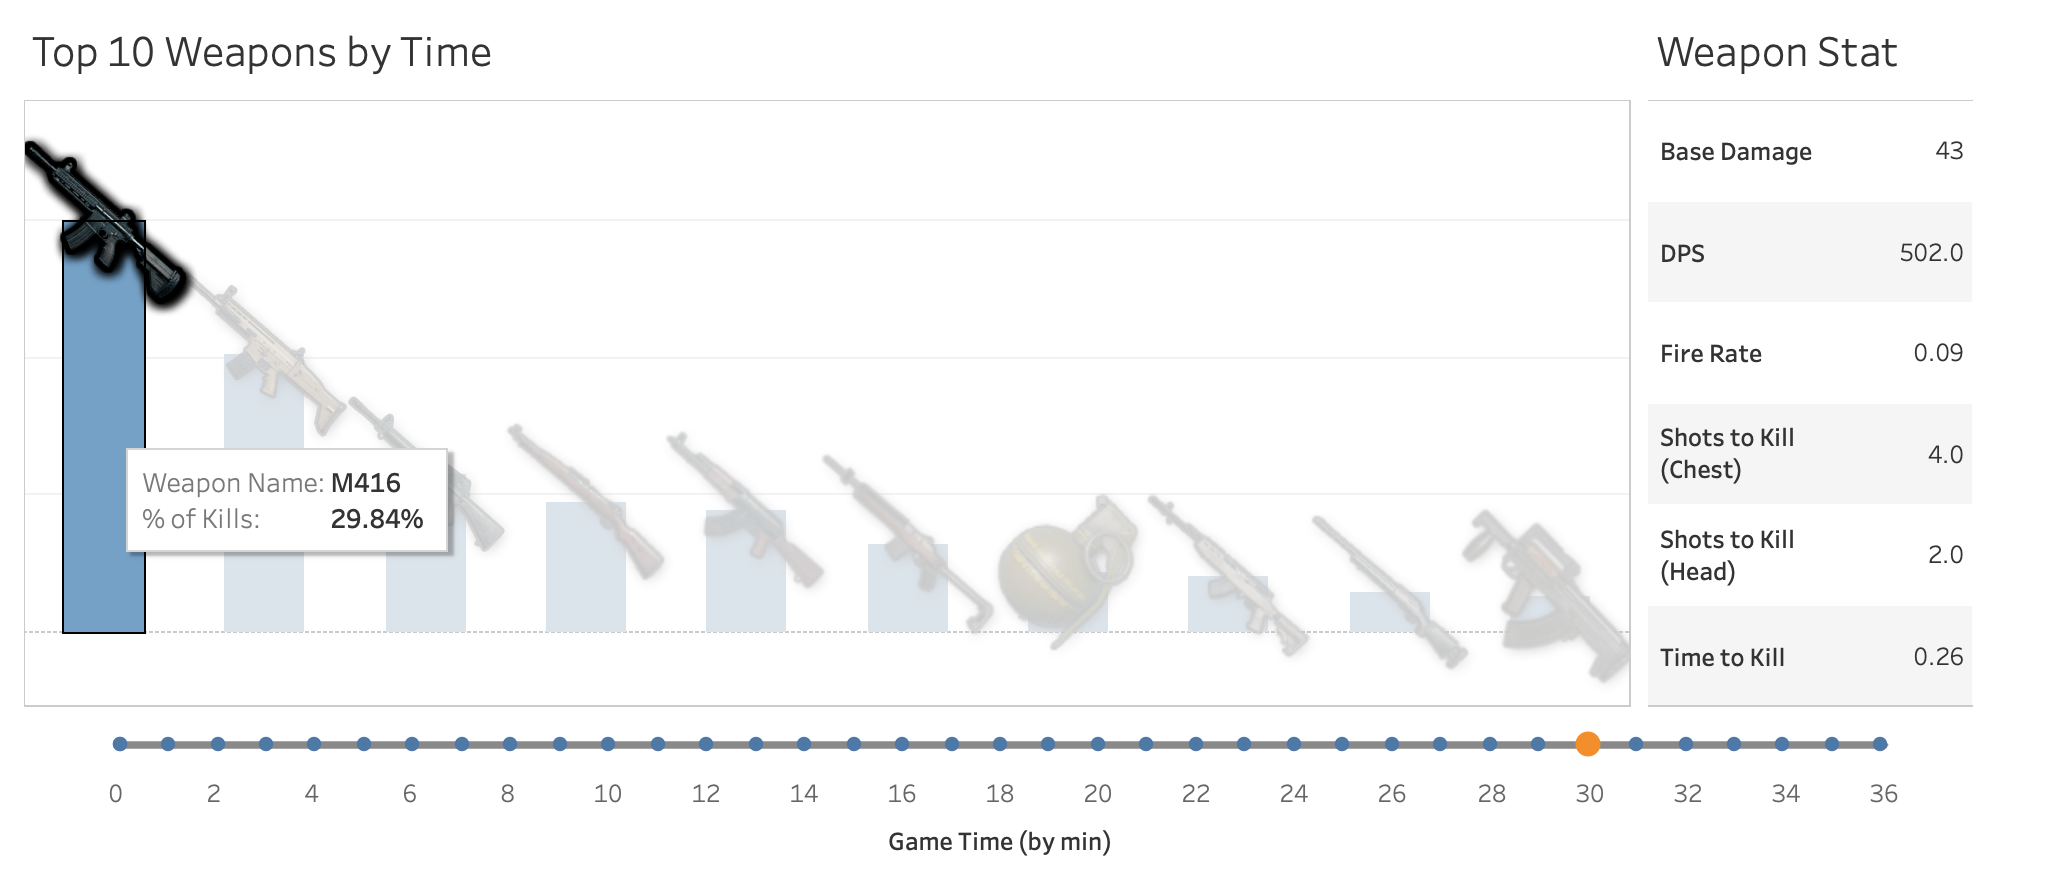

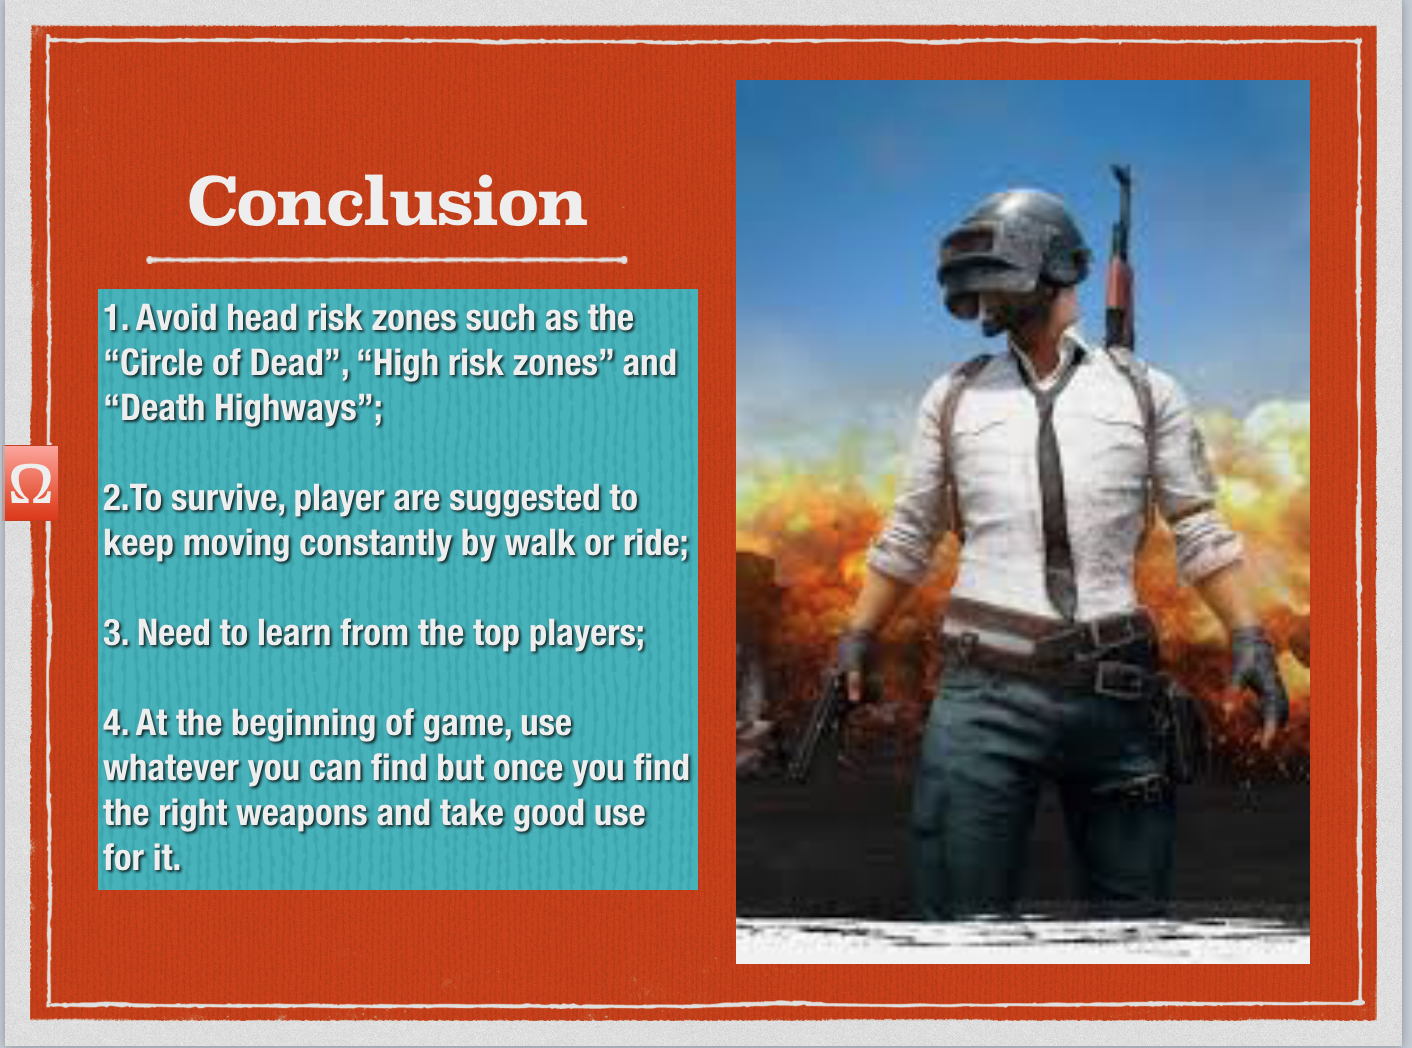

# Data Cleaning & Data Exploration

In [1]:
#load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

train = pd.read_csv('train_V2.csv',sep=',')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [2]:
#find and remove null data
null_train = train.isnull().sum()
print(null_train)
train[train['winPlacePerc'].isnull()]

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


Id         groupId         matchId  assists  boosts  \
2744604  f70c74418bb064  12dfbede33f92b  224a123c53e008        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
2744604          0.0      0              0      0          1  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
2744604           0.0          0           0.0          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
2744604           0.0                0          0           NaN  

[1 rows x 29 columns]

In [2]:
train.dropna(inplace=True)
#Item describtion
train.describe(include=np.number).drop('count').T

mean          std    min     25%        50%  \
assists             0.233815     0.588573    0.0     0.0     0.0000   
boosts              1.106908     1.715794    0.0     0.0     0.0000   
damageDealt       130.717167   170.780629    0.0     0.0    84.2400   
DBNOs               0.657876     1.145743    0.0     0.0     0.0000   
headshotKills       0.226820     0.602155    0.0     0.0     0.0000   
heals               1.370148     2.679982    0.0     0.0     0.0000   
killPlace          47.599361    27.462931    1.0    24.0    47.0000   
killPoints        505.006156   627.504921    0.0     0.0     0.0000   
kills               0.924784     1.558445    0.0     0.0     0.0000   
killStreaks         0.543955     0.710972    0.0     0.0     0.0000   
longestKill        22.997600    50.972623    0.0     0.0     0.0000   
matchDuration    1579.506793   258.738814  133.0  1367.0  1438.0000   
maxPlace           44.504680    23.828099    2.0    28.0    30.0000   
numGroups          43.007602    23.289489    1.0    27.0    30.0000   
rankPoints        892.010303   736.647791   -1.0    -1.0  1443.0000   
revives             0.164659     0.472167    0.0     0.0     0.0000   
rideDistance      606.115805  1498.343654    0.0     0.0     0.0000   
roadKills           0.003496     0.073373    0.0     0.0     0.0000   
swimDistance        4.509323    30.502203    0.0     0.0     0.0000   
teamKills           0.023868     0.167394    0.0     0.0     0.0000   
vehicleDestroys     0.007918     0.092612    0.0     0.0     0.0000   
walkDistance     1154.218119  1183.497048    0.0   155.1   685.6000   
weaponsAcquired     3.660488     2.456543    0.0     2.0     3.0000   
winPoints         606.460267   739.700471    0.0     0.0     0.0000   
winPlacePerc        0.472822     0.307405    0.0     0.2     0.4583   

                       75%      max  
assists             0.0000     22.0  
boosts              2.0000     33.0  
damageDealt       186.0000   6616.0  
DBNOs               1.0000     53.0  
headshotKills       0.0000     64.0  
heals               2.0000     80.0  
killPlace          71.0000    101.0  
killPoints       1172.0000   2170.0  
kills               1.0000     72.0  
killStreaks         1.0000     20.0  
longestKill        21.3200   1094.0  
matchDuration    1851.0000   2237.0  
maxPlace           49.0000    100.0  
numGroups          47.0000    100.0  
rankPoints       1500.0000   5910.0  
revives             0.0000     39.0  
rideDistance        0.1910  40710.0  
roadKills           0.0000     18.0  
swimDistance        0.0000   3823.0  
teamKills           0.0000     12.0  
vehicleDestroys     0.0000      5.0  
walkDistance     1976.0000  25780.0  
weaponsAcquired     5.0000    236.0  
winPoints        1495.0000   2013.0  
winPlacePerc        0.7407      1.0

In [4]:
#count unique id, group id and match id

print('Unique Id:',train['Id'].nunique())
print('Unique Group Id:',train['groupId'].nunique())
print('Unique Match Id:',train['matchId'].nunique())

Unique Id: 4446965
Unique Group Id: 2026744
Unique Match Id: 47964


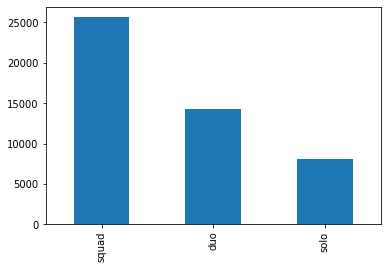

In [3]:
#match type
gametype = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(gametype)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [4]:
#select only solo games & remove duo or group match related columns
solo_train=train[train['matchType']=='solo']
solo_train=solo_train.drop(['assists','DBNOs','revives','teamKills'],axis=1)

In [5]:
#number of players at for each match
solo_train['playerqty'] = solo_train.groupby('matchId')['matchId'].transform('count')
data = solo_train.copy()
plt.figure(figsize=(15,10))
sns.countplot(data['playerqty'])
plt.title('No. of Players Joined',fontsize=15)
plt.show()

In [7]:
#remove maches with number of players less than 50
solo_train=solo_train[solo_train['playerqty']>49]
solo_train['playerqty'].describe(include=np.number).drop('count').T

mean     95.082696
std       3.979942
min      51.000000
25%      94.000000
50%      96.000000
75%      97.000000
max     100.000000
Name: playerqty, dtype: float64

In [8]:
#count unique id, group id and match id

print('Unique Id:',solo_train['Id'].nunique())
print('Unique Group Id:',solo_train['groupId'].nunique())
print('Unique Match Id:',solo_train['matchId'].nunique())

solo_train.info()

Unique Id: 709343
Unique Group Id: 689404
Unique Match Id: 7477
<class 'pandas.core.frame.DataFrame'>
Int64Index: 709343 entries, 4 to 4446965
Data columns (total 26 columns):
Id                 709343 non-null object
groupId            709343 non-null object
matchId            709343 non-null object
boosts             709343 non-null int64
damageDealt        709343 non-null float64
headshotKills      709343 non-null int64
heals              709343 non-null int64
killPlace          709343 non-null int64
killPoints         709343 non-null int64
kills              709343 non-null int64
killStreaks        709343 non-null int64
longestKill        709343 non-null float64
matchDuration      709343 non-null int64
matchType          709343 non-null object
maxPlace           709343 non-null int64
numGroups          709343 non-null int64
rankPoints         709343 non-null int64
rideDistance       709343 non-null float64
roadKills          709343 non-null int64
swimDistance       709343 non-null 

In [10]:
#kill count

kill = solo_train.copy()
kill.loc[kill['kills'] > 8] = '9+'
plt.figure(figsize=(15,8))
sns.countplot(kill['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=10)
plt.show()

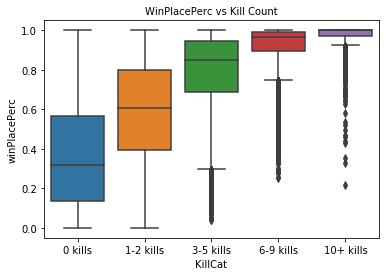

In [11]:
#WinPlacePerc is corelated with Kill Count

kill=solo_train.copy()
kill['KillCat'] = pd.cut(kill['kills'], [-1, 0, 2, 5, 9, 60], labels=['0 kills','1-2 kills', '3-5 kills', '6-9 kills', '10+ kills'])
plt.title("WinPlacePerc vs Kill Count",fontsize=10)
sns.boxplot(x='KillCat', y="winPlacePerc", data=kill)
plt.show()

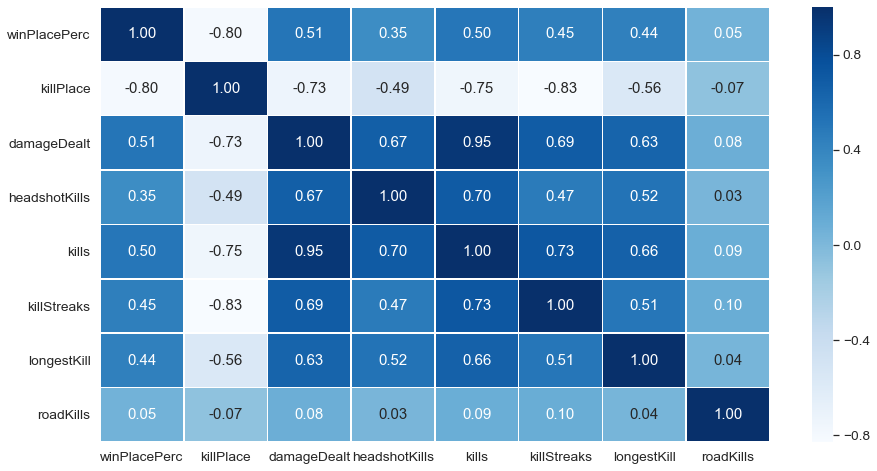

In [14]:
#Corelation Table
#result:'winPlacePerc'
#Damage or Kill: 'kill Place','damageDealt','headshotKills','kills','killStreaks','longestKill','roadKills'
#Moving: 'rideDistance','swimDistance','walkDistance'
#Item: 'boost','heals','vehicleDestroys','weaponsAcquired'

f,ax = plt.subplots(figsize=(15, 8))
cols = solo_train[['winPlacePerc','killPlace','damageDealt','headshotKills','kills','killStreaks','longestKill','roadKills']]
sns.heatmap(cols.corr(), annot=True, linewidths=.5, fmt= '.2f',cmap='Blues',ax=ax)
plt.show()

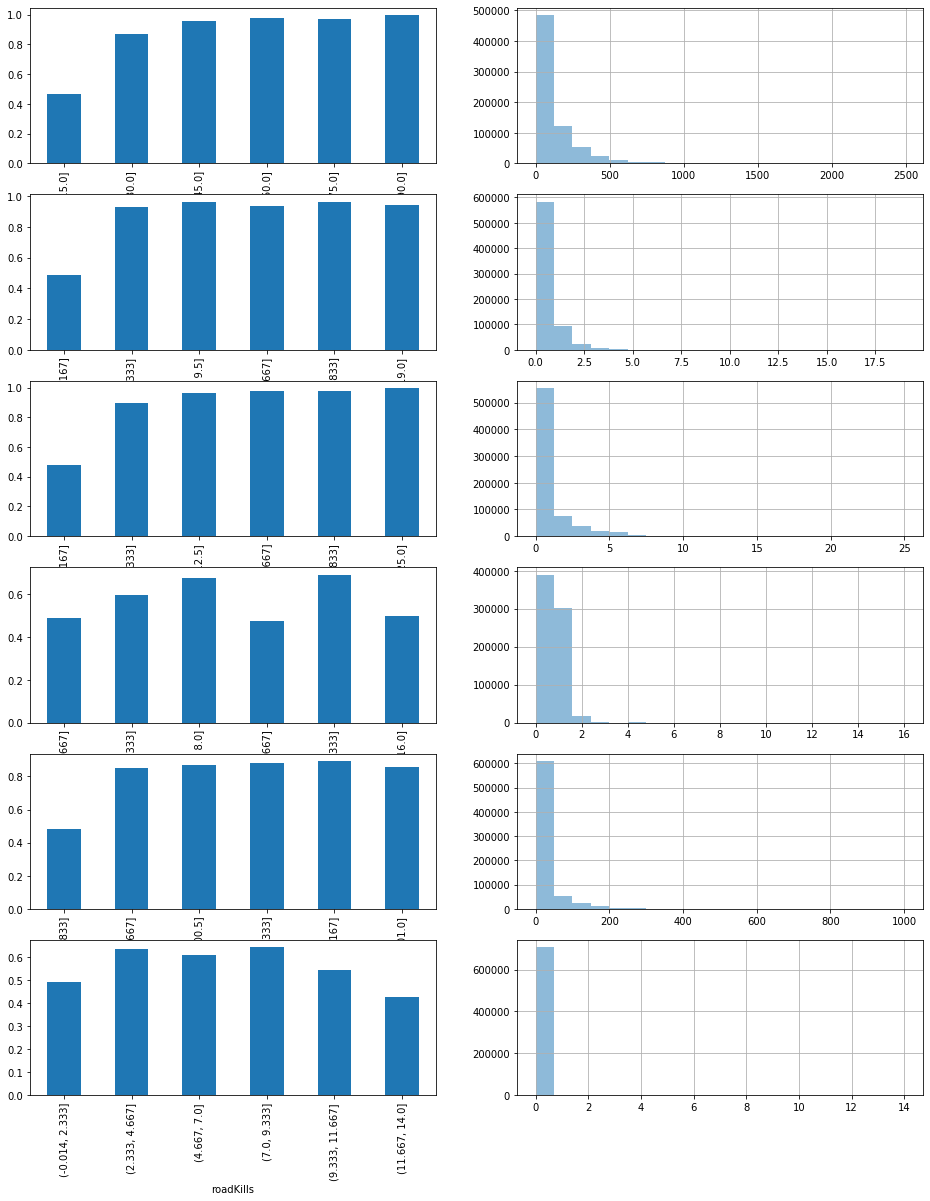

In [13]:
fig, ax = plt.subplots(6, 2, figsize=(16, 20))

cols = ['damageDealt','headshotKills','kills','killStreaks','longestKill','roadKills']
for col, ax in zip(cols, ax):
    sub = solo_train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(ax=ax[0])
    solo_train[col].hist(alpha=0.5, bins=20, ax=ax[1])

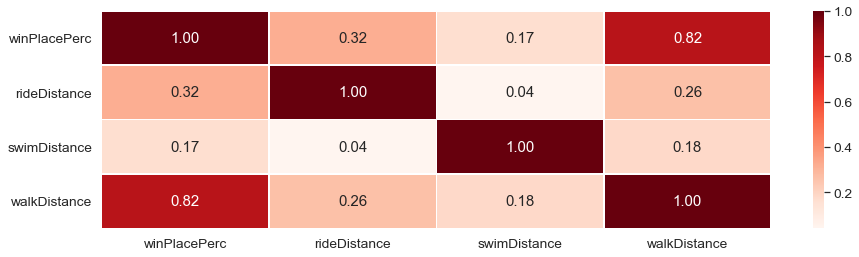

In [15]:
#Corelation Table
#result:'winPlacePerc'
#Damage or Kill: 'kill Place','damageDealt','headshotKills','kills','killStreaks','longestKill','roadKills'
#Moving: 'rideDistance','swimDistance','walkDistance'
#Item: 'boost','heals','vehicleDestroys','weaponsAcquired'

f,ax = plt.subplots(figsize=(15, 4))
cols_2 = solo_train[['winPlacePerc','rideDistance','swimDistance','walkDistance']]
sns.heatmap(cols_2.corr(), annot=True, linewidths=.5, fmt= '.2f',cmap='Reds',ax=ax)
plt.show()

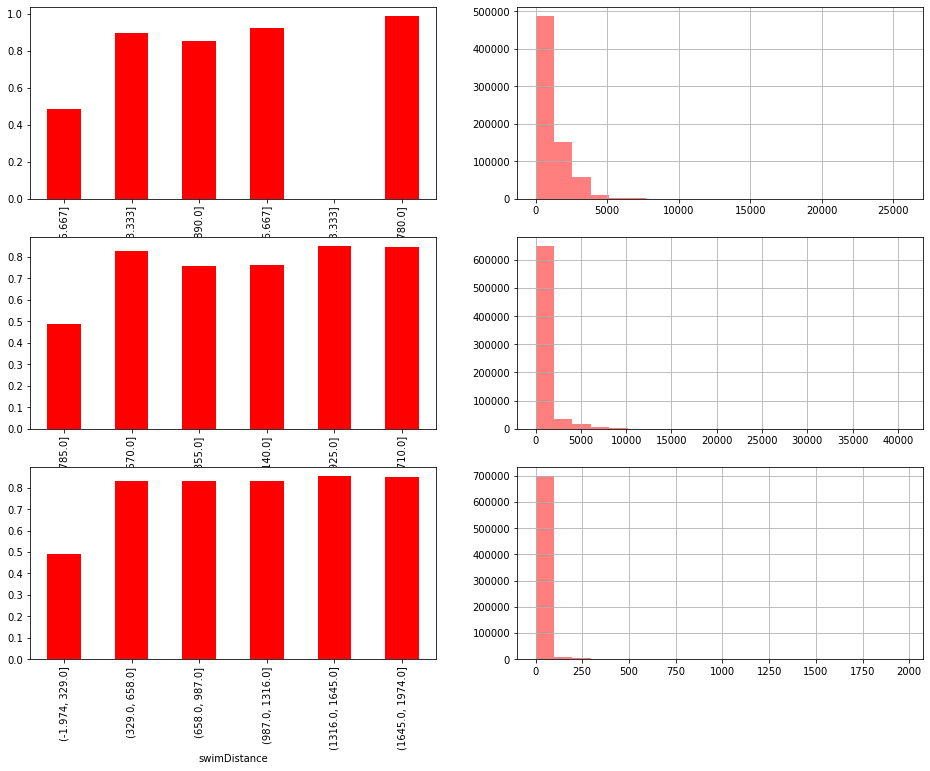

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))

cols = ['walkDistance', 'rideDistance', 'swimDistance']
for col, ax in zip(cols, ax):
    sub = solo_train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(color='Red',ax=ax[0])
    solo_train[col].hist(alpha=0.5, bins=20, color='Red', ax=ax[1])

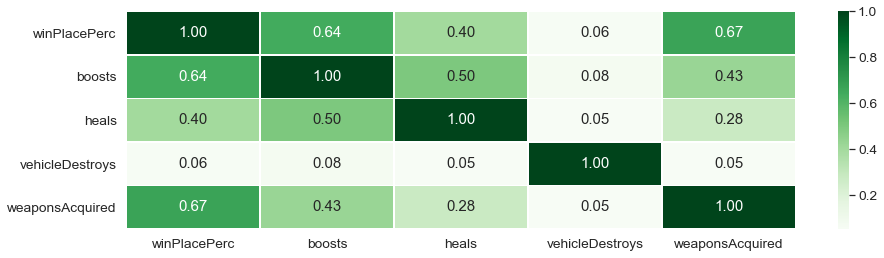

In [16]:
#Corelation Table
#result:'winPlacePerc'
#Damage or Kill: 'kill Place','damageDealt','headshotKills','kills','killStreaks','longestKill','roadKills'
#Moving: 'rideDistance','swimDistance','walkDistance'
#Item: 'boost','heals','vehicleDestroys','weaponsAcquired'

f,ax = plt.subplots(figsize=(15, 4))
cols_2 = solo_train[['winPlacePerc','boosts','heals','vehicleDestroys','weaponsAcquired']]
sns.heatmap(cols_2.corr(), annot=True, linewidths=.5, fmt= '.2f',cmap='Greens',ax=ax)
plt.show()

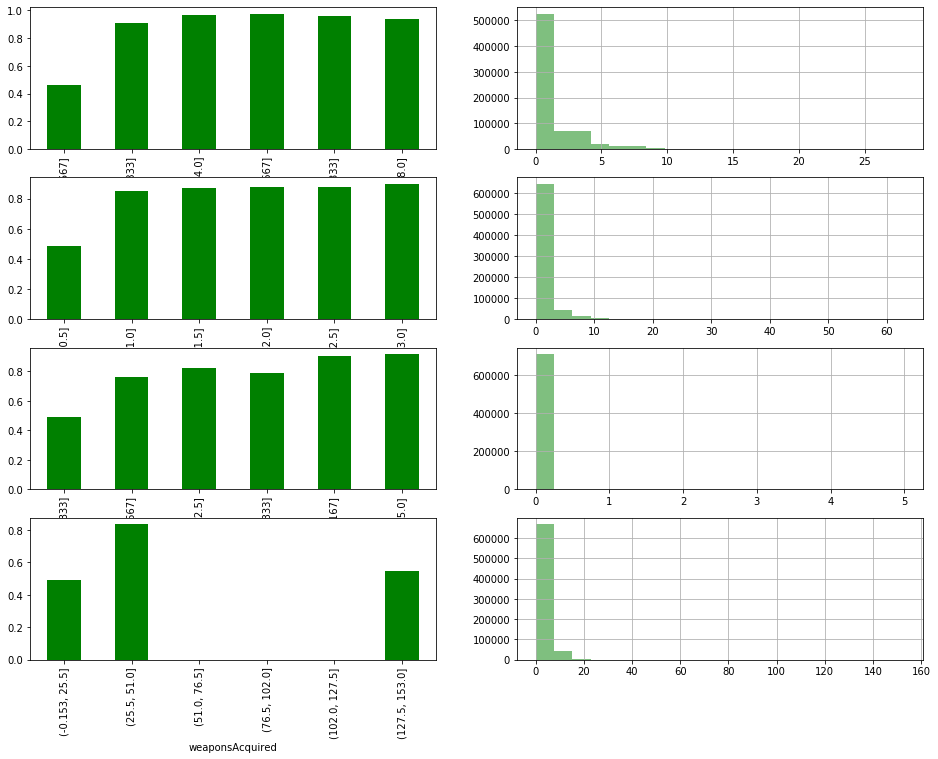

In [17]:
fig, ax = plt.subplots(4, 2, figsize=(16, 12))

cols = ['boosts','heals','vehicleDestroys','weaponsAcquired']
for col, ax in zip(cols, ax):
    sub = solo_train[['winPlacePerc',col]].copy()
    sub[col] = pd.cut(sub[col], 6)
    sub.groupby(col).mean()['winPlacePerc'].plot.bar(color='Green', ax=ax[0])
    solo_train[col].hist(alpha=0.5, bins=20, color='Green', ax=ax[1])

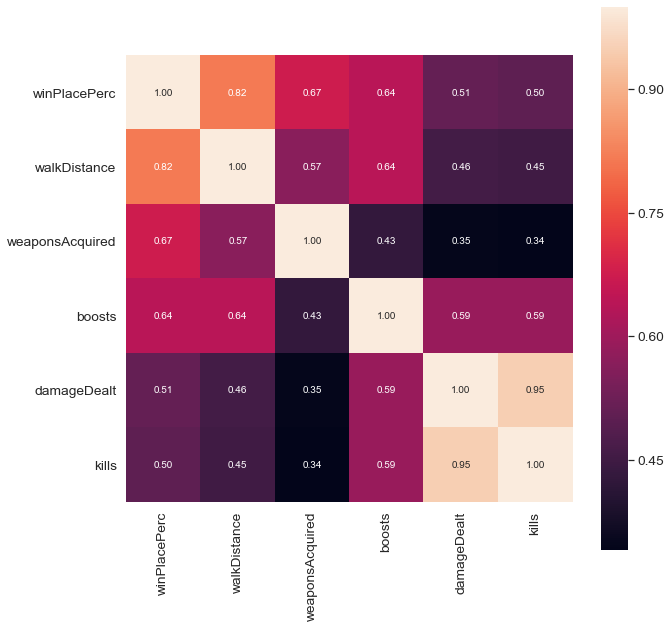

In [20]:
k = 6 #number of variables for heatmap
corrmat = solo_train.corr() 
cols = corrmat.nlargest(k, 'winPlacePerc').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(solo_train[cols].values.T) # correlation 
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Prediction Model

In [42]:
# select independent variables for model

X =  solo_train.loc[:, ['boosts',
                          'damageDealt',
                          #'headshotKills',
                          'heals',
                          'killPlace',
                          'killPoints',
                          'kills',
                          'killStreaks',
                          'longestKill',
                          'rideDistance',
                           #'roadKills',
                           #'swimDistance',
                           #'vehicleDestroys',
                           'walkDistance',
                           'weaponsAcquired']
                      ]

In [43]:
# apply a square root transformation to the data

X = X + 0.000000001
X = np.sqrt(X)

In [44]:
# select dependent variable
y = solo_train.loc[:, 'winPlacePerc']

# make sure X and y length are the same
print(len(X),len(y))

709343 709343


In [45]:
# split data into training and testing sets

test_perc = 0.2

X_train = X[:int((1-test_perc)*len(X))]
y_train = y[:int((1-test_perc)*len(y))]
print(len(X_train), len(y_train))

X_test = X[int((1-test_perc)*len(X)):]
y_test = y[int((1-test_perc)*len(y)):]


#make sure combined length of both sets equals original data set

print(len(X_test), len(y_test))
print(len(X_test) + len(X_train) == len(solo_train))

567474 567474
141869 141869
True


In [46]:
import statsmodels.api as sm

# check that dependent variables have significant contributions to model
# check for multicollinearity

results = sm.OLS(y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           winPlacePerc   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                          1.258e+06
Date:                Mon, 16 Dec 2019   Prob (F-statistic):                        0.00
Time:                        19:43:47   Log-Likelihood:                      4.2834e+05
No. Observations:              567474   AIC:                                 -8.567e+05
Df Residuals:                  567463   BIC:                                 -8.565e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
boosts              0.0368      0.000    121.994      0.000       0.036       0.037
damageDealt         0.0025   4.79e-05     52.015      0.000       0.002       0.003
heals               0.0012      0.000      5.125      0.000       0.001       0.002
killPlace           0.0001   4.57e-05      3.087      0.002    5.14e-05       0.000
killPoints          0.0003   8.96e-06     34.844      0.000       0.000       0.000
kills               0.0052      0.001      6.458      0.000       0.004       0.007
killStreaks         0.0155      0.001     20.381      0.000       0.014       0.017
longestKill        -0.0010   7.54e-05    -12.950      0.000      -0.001      -0.001
rideDistance        0.0004   8.44e-06     53.273      0.000       0.000       0.000
walkDistance        0.0114   1.46e-05    781.025      0.000       0.011       0.011
weaponsAcquired     0.0773      0.000    272.642      0.000       0.077       0.078
==============================================================================
Omnibus:                    32655.292   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68317.277
Skew:                           0.398   Prob(JB):                         0.00
Kurtosis:                       4.501   Cond. No.                         251.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# train Linear Regression model

from sklearn.linear_model import LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
# train Ridge Regression model with candidate values

from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_model.fit(X_train,y_train)
print('Alpha Candidate Chosen=', ridge_model.alpha_)

Alpha Candidate Chosen= 1.0


In [49]:
#train adaboost model

from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(n_estimators=100).fit(X_train, y_train)
from sklearn.ensemble import GradientBoostingRegressor
gradient_model = GradientBoostingRegressor(n_estimators=100).fit(X_train, y_train)

In [50]:
def adj_r2(r2, n,p):
    return (1-(1-r2)*((n-1)/(n-p-1)))

# print out Adjusted R2 results from all models

print("OLS:", adj_r2(ols_model.score(X_test,y_test), X_test.shape[0], X_test.shape[1]))
print("Ridge:", adj_r2(ridge_model.score(X_test,y_test), X_test.shape[0], X_test.shape[1]))
print("AdaBoost:", adj_r2(ada_model.score(X_test,y_test), X_test.shape[0], X_test.shape[1]))
print("Gradient Tree:", adj_r2(gradient_model.score(X_test,y_test), X_test.shape[0], X_test.shape[1]))

OLS: 0.9121269081135818
Ridge: 0.9121268759232596
AdaBoost: 0.893025385071399
Gradient Tree: 0.9323599300593886


In [51]:
# predict test results

y_pred = gradient_model.predict(X_test)

In [57]:
# Compile prediction results into dataframe

df_results = pd.DataFrame({'Predicted':y_pred[:],'Actual':y_test.values[:]})
df_results['Predicted'] = df_results['Predicted'].apply(lambda x:x if x <=1 else 1)
df_results['error'] = (df_results['Predicted'] - df_results['Actual']).abs()
df_results['Pred_%'] = (df_results['Predicted'] * 100).astype('int').astype('str') + "%"
df_results['Actual_%'] = (df_results['Actual'] * 100).astype('int').astype('str') + "%"

print("Show First 10 Predictions")
df_results.head(10)

Show First 10 Predictions


Predicted  Actual     error Pred_% Actual_%
0   0.023751  0.0000  0.023751     2%       0%
1   0.593767  0.4316  0.162167    59%      43%
2   0.416105  0.4149  0.001205    41%      41%
3   0.749448  0.8211  0.071652    74%      82%
4   0.471993  0.5155  0.043507    47%      51%
5   0.932395  0.9468  0.014405    93%      94%
6   0.896116  0.9394  0.043284    89%      93%
7   0.395958  0.4043  0.008342    39%      40%
8   0.075364  0.0549  0.020464     7%       5%
9   0.255011  0.2340  0.021011    25%      23%

In [53]:
# Mean Absolute Error

print(df_results['error'].mean())

0.05611641986860211


In [54]:
# output predictions to CSV

df_results.to_csv('results.csv')

In [55]:
# Remove anormal players
solo_train['totalDistance']=solo_train['rideDistance']+solo_train['walkDistance']+solo_train['swimDistance']
solo_train['killsWithoutMoving']=((solo_train['kills']>0) & (solo_train['totalDistance']==0))
solo_train['headshotrate']=solo_train['headshotKills']/solo_train['kills']
solo_train['headshotrate']=solo_train['headshotrate'].fillna(0)

st2=solo_train.copy()

st2.drop(st2[st2['killsWithoutMoving']==True].index, inplace=True)
st2.drop(st2[st2['roadKills']>10].index, inplace=True)
st2.drop(st2[st2['longestKill']>=1000].index, inplace=True)
st2.drop(st2[st2['swimDistance']>=2000].index, inplace=True)
st2.drop(st2[st2['weaponsAcquired']>=80].index, inplace=True)
st2.drop(st2[st2['heals']>=40].index, inplace=True)


print('Unique Id:',st2['Id'].nunique())
print('Unique Group Id:',st2['groupId'].nunique())
print('Unique Match Id:',st2['matchId'].nunique())

#plt.figure(figsize=(12,4))
#sns.distplot(solo_train['headshotrate'],bins=10)
#plt.show()

#plt.figure(figsize=(12,4))
#sns.distplot(solo_train['totalDistance'],bins=10)
#plt.show()

Unique Id: 709099
Unique Group Id: 689171
Unique Match Id: 7477
